In [ ]:
%%writefile requirements.txt
aiohttp==3.13.3
annotated-types==0.7.0
anyio==4.12.1
attrs==25.4.0
certifi==2026.1.4
charset-normalizer==3.4.4
faiss-cpu==1.13.2
filelock==3.24.2
fsspec==2026.2.0
httpcore==1.0.9
httpx==0.28.1
huggingface_hub==0.36.2
idna==3.11
joblib==1.5.3
langchain==1.2.10
langchain-classic==1.0.1
langchain-community==0.4.1
langchain-core==1.2.15
langchain-huggingface==1.2.0
langchain-openai==1.1.10
langchain-text-splitters==1.1.1
langgraph==1.0.9
langsmith==0.7.6
numpy==2.4.2
openai==2.23.0
orjson==3.11.7
packaging==26.0
pandas==3.0.1
pydantic==2.12.5
pydantic-settings==2.13.1
pypdf==6.7.2
python-dotenv==1.2.1
PyYAML==6.0.3
requests==2.32.4
scikit-learn==1.8.0
scipy==1.17.0
sentence-transformers==5.2.2
SQLAlchemy==2.0.46
tenacity==9.1.4
tiktoken==0.12.0
tokenizers==0.22.2
torch==2.10.0
transformers==5.1.0
typing_extensions==4.15.0
urllib3==2.6.3
xxhash==3.6.0

Writing requirements.txt


In [ ]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.6/90.6 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 4.7 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of langchain-community to determine which version is compatible with other requirements. This could take a while.
ERROR: Cannot install -r requirements.txt (line 12), -r requirements.txt (line 16), -r requirements.txt (line 17) and requests==2.32.4 because these package versions have conflicting dependencies.

The conflict is caused by:
    The user requested requests==2.32.4
    huggingface-hub 0.36.2 depends on requests
    langchain-classic 1.0.1 depends on requests<3.0.0 and >=2.0.0
    langchain-community 0.4.1 depends on requests<3.0.0 and >=2.32.5

To fix this you could try to:
1. loosen the range of package versions you've specified
2. remove package versions to allow pip to attempt to solve the depen

In [ ]:
import os
os.kill(os.getpid(), 9)

In [ ]:
!pip list | grep -E "langchain|openai|transformers|requests"

langchain                                1.2.10
langchain-core                           1.2.13
openai                                   2.21.0
requests                                 2.32.4
requests-oauthlib                        2.0.0
requests-toolbelt                        1.0.0
sentence-transformers                    5.2.3
transformers                             5.0.0


In [ ]:
import os
from dotenv import load_dotenv
load_dotenv()

False

In [ ]:
from langchain_community.embeddings import HuggingFaceEmbeddings
from langchain_community.vectorstores.faiss import FAISS
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import PyPDFLoader
from langchain_community.vectorstores.utils import DistanceStrategy

In [ ]:
!pip -q install langchain-community==0.4.1
!python -c "import langchain_community; print('langchain_community OK')"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 50.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 3.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.32.4, but you have requests 2.32.5 which is incompatible.
langchain_community OK


In [ ]:
pip install pypdf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 331.3/331.3 kB 3.7 MB/s eta 0:00:00


In [ ]:
loader = PyPDFLoader("КР379_4.pdf")
documents = loader.load()

In [ ]:
MARKDOWN_SEPARATORS = [
    "\n#{1,6} ",
    "```\n",
    "\n\\*\\*\\*+\n",
    "\n---+\n",
    "\n___+\n",
    "\n\n",
    "\n",
    " ",
    "",
]


text_splitter = RecursiveCharacterTextSplitter(
    chunk_size = 1000,
    chunk_overlap=100,
    add_start_index=True,
    strip_whitespace=True,
    separators=MARKDOWN_SEPARATORS,
)



In [ ]:
doc_processed = []
for doc in documents:
    doc_processed += text_splitter.split_documents([doc])

In [ ]:
len(doc_processed)

338

In [ ]:
import requests
from langchain_community.document_loaders import PyPDFLoader
from langchain_core.documents import Document

WEB_URLS = [
    "https://pubmed.ncbi.nlm.nih.gov/41213254/",
    "https://bpno.dk/wp-content/uploads/2023/10/ASCO-guidelines-breast-cancer-survivorship-care-1.pdf",
    "https://docslib.org/doc/2272935/nccn-breast-cancer-clinical-practice-guidelines",
    "https://vdoc.pub/documents/esmo-early-breast-cancer-clinical-practice-guidelines-4rvg00h0kj40",
    "https://vdoc.pub/documents/esmo-metastatic-breast-cancer-clinical-practice-guidelines-5r7q1e0k9q80",
    "https://www.nice.org.uk/guidance/ng101/resources/breast-cancer-diagnosis-and-management-pdf-66141532975557",
    "https://www.nice.org.uk/guidance/cg81/resources/advanced-breast-cancer-pdf-975711090885",
    "https://tumourclassification.iarc.who.int/chapters/32",
    "https://cr.minzdrav.gov.ru/view-cr/379_4",
    "https://nop2030.ru/dokumenty/klinicheskie-rekomendatsii-rak-molochnoj-zhelezy/",
    "https://disuria.ru/_ld/12/1279_kr21D05C50MZ.pdf",
    "https://rosoncoweb.ru/standarts/RUSSCO/2024/breast_cancer.pdf",
    "https://rosoncoweb.ru/standarts/RUSSCO/2024/metastatic_breast.pdf",
    "https://rosoncoweb.ru/standarts/RUSSCO/2024/supportive_care.pdf",
    "https://rosoncoweb.ru/standarts/RUSSCO/2024/vte.pdf",
    "https://rosoncoweb.ru/standarts/RUSSCO/2024/geriatric_oncology.pdf"

]

def safe_ingest_url(url: str):
    try:

        if url.lower().endswith(".pdf"):
            path = "/content/tmp.pdf"
            r = requests.get(url, headers={"User-Agent":"Mozilla/5.0"}, timeout=60)
            r.raise_for_status()
            with open(path, "wb") as f:
                f.write(r.content)

            docs = PyPDFLoader(path).load()
            for d in docs:
                d.metadata.update({"source": "web_pdf", "url": url})
            return docs


        r = requests.get(url, headers={"User-Agent":"Mozilla/5.0"}, timeout=30)
        if r.status_code == 403:
            print(f"[skip:403] blocked: {url}")
            return []
        r.raise_for_status()

        #фильтр для заглушек
        if len(r.text) < 5000:
            print(f"[skip] too little html: {url}")
            return []


        return [Document(page_content=r.text, metadata={"source": "web_html", "url": url})]

    except Exception as e:
        print(f"[error] {url}: {e}")
        return []


web_docs_raw = []
for url in WEB_URLS:
    web_docs_raw.extend(safe_ingest_url(url))

print("web_docs_raw:", len(web_docs_raw))


web_chunks = []
for d in web_docs_raw:
    web_chunks += text_splitter.split_documents([d])

print("web_chunks:", len(web_chunks))


for d in web_chunks:
    if not d.page_content.startswith("passage:"):
        d.page_content = "passage: " + d.page_content

[skip:403] blocked: https://pubmed.ncbi.nlm.nih.gov/41213254/
[error] https://www.nice.org.uk/guidance/ng101/resources/breast-cancer-diagnosis-and-management-pdf-66141532975557: 404 Client Error: Not Found for url: https://www.nice.org.uk/guidance/ng101/resources/breast-cancer-diagnosis-and-management-pdf-66141532975557
[error] https://www.nice.org.uk/guidance/cg81/resources/advanced-breast-cancer-pdf-975711090885: 404 Client Error: Not Found for url: https://www.nice.org.uk/guidance/cg81/resources/advanced-breast-cancer-pdf-975711090885


In [ ]:
from sentence_transformers import SentenceTransformer
EMBEDDING_MODEL_NAME = "intfloat/multilingual-e5-base"


print(f"Model's maximum sequence length: {SentenceTransformer(EMBEDDING_MODEL_NAME).max_seq_length}")


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/387 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/57.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/694 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

Loading weights:   0%|          | 0/199 [00:00<?, ?it/s]

XLMRobertaModel LOAD REPORT from: intfloat/multilingual-e5-base
Key                     | Status     |  | 
------------------------+------------+--+-
embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


tokenizer_config.json:   0%|          | 0.00/418 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/200 [00:00<?, ?B/s]

Model's maximum sequence length: 512


100%|██████████| 338/338 [00:00<00:00, 1093.16it/s]


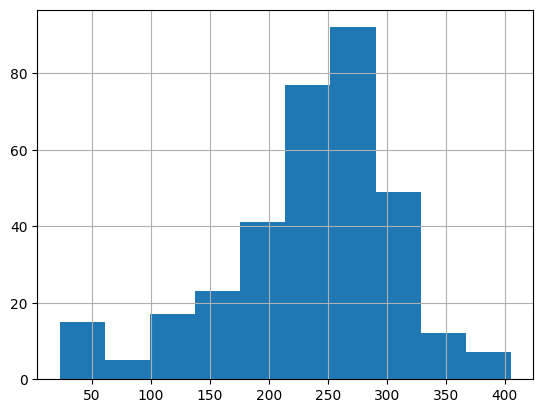

In [ ]:
from transformers import AutoTokenizer
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt

tokenizer = AutoTokenizer.from_pretrained(EMBEDDING_MODEL_NAME)


lengths = [len(tokenizer.encode(doc.page_content)) for doc in tqdm(doc_processed)]

pd.Series(lengths).hist()
plt.show()




In [ ]:
!pip install -q faiss-cpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.8/23.8 MB 51.0 MB/s eta 0:00:00


In [ ]:
from langchain_community.vectorstores.faiss import FAISS
from langchain_community.embeddings import HuggingFaceEmbeddings
from langchain_community.vectorstores.utils import DistanceStrategy

EMBEDDING_MODEL_NAME = "sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2"

embedding_model = HuggingFaceEmbeddings(
    model_name=EMBEDDING_MODEL_NAME,
    encode_kwargs={"normalize_embeddings": True},
)

all_docs_for_index = doc_processed + web_chunks

KNOWLAGE_VECTOR_DATABASE = FAISS.from_documents(
    all_docs_for_index,
    embedding_model,
    distance_strategy=DistanceStrategy.COSINE
)

Loading weights:   0%|          | 0/199 [00:00<?, ?it/s]

BertModel LOAD REPORT from: sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2
Key                     | Status     |  | 
------------------------+------------+--+-
embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


In [ ]:
!pip install -q langchain-openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 1.8 MB/s eta 0:00:00


In [ ]:
from langchain_openai import ChatOpenAI

reader_llm = ChatOpenAI(
    model_name="gpt-4o",
    temperature=0,
    api_key = 'YOUR OPEANAI KEY'
)

In [ ]:
import os
os.kill(os.getpid(), 9)

In [ ]:
def rag_check_plan(q, similarity_threshold=0.8):

    splitter = RecursiveCharacterTextSplitter(

        chunk_size=512,
        chunk_overlap=50,
        separators=["\n\n", "\n", " ", ""]
    )
    chunks = splitter.split_text(q)

    retriever = KNOWLAGE_VECTOR_DATABASE.as_retriever(search_type="mmr", search_kwargs={"k": 3, "fetch_k": 50})
    all_docs = []

    for chunk in chunks:
        print(chunk)
        docs_chunk = retriever.invoke(
            chunk
        )
        all_docs.extend(docs_chunk)

    unique_docs = list({doc.page_content: doc for doc in all_docs}.values())

    if not unique_docs:
        return "Нет достаточных документов для проверки плана лечения."

    context = "\n\n".join([doc.page_content for doc in unique_docs])

    prompt = f"""
Ты — эксперт по медицинской информации.
Задача: проверить план лечения, предоставленный врачом, по документам.

План лечения/история болезни:
{q}

Документы для проверки:
{context}

Инструкции:
- Сравни план с информацией в документах.
- Если есть несоответствия, укажи их и предложи правильный вариант.
- Не придумывай факты, используй только документы.
- Если всё верно, напиши: "План соответствует данным."
"""


    answer = reader_llm.invoke(prompt)
    return answer

In [ ]:
q = """
Диагноз: Рак левой молочной железы сT2N0М0, IIА ст. Трижды негативный подтип. НАПХТ 4АС + 12P и хирургическое лечение в 2017. Прогрессирование от 08.2021 (локальный рецидив + мтс в л\у корня легкого). ПХТ 1 линии (паклитаксел+карбоплатин) с 09.2021 по 03.2022. Прогрессирование от 16.03.2022 (продолженный рост очагов). ХТ 2 линии эрибулином с 03.2022 по 08.2022. Прогрессирование от 03.08.2022. ХТТ 3 линии (карбоплатин+гемцитабин+бевацизумаб) с 19.08.2022 по 02.2023. Прогрессирование от 02.03.2023 (продолженный рост). ХТ 4 линии винорельбином с 22.03.2023 по 05.2023. Прогрессирование от 17.05.2023. ПХТ 5 линии (иксабепилон+капецитабин) с 05.2023 по 12.2023. Прогрессирование от 09.01.2024 . 1 курс ИТ 6 линии атезолизумабом от 02.2024. ХТТ 7 линии (иринотекан+гемцитабин+бевацизумаб ) с 25.03.2024 по 07.2024. Прогрессирование от 08.2024 (продолженный рост). ПХТ 8 линии (паклитаксел+ карбоплатин/цисплатин) с 08.2024 по 03.2025. ХТ 9 линии доксорубицином с 12.2024 по 28.01.2025. Прогрессирование от 10.03.2025 (продолженный рост опухоли в м/ж, л/у, в легких). ХТ 10 линии (циклофосфамид+метотрексат) с 25.05.2025г по 25.07.2025г. ХТТ 11 линии (BCD-236 + винорельбин) с 28.08.2025 по 11.12.2025. Прогрессирование от 16.12.2025 (продолженный рост опухоли в м/ж, л/у, легких).

Анамнез заболевания:

ТАБ опухоли левой молочной железы в 2017г.

ГИ и ИГХ: инфильтративная карцинома G3, ER-0б, PR - 0б, Her 2-1+, Ki67 - 80%.

Комбинированное лечение в 2017 по поводу карциномы левой молочной железы. НАПХТ по схеме: 4 АС + 12P (доксорубицин+циклофосфамид, 1 раз в 3 недели и паклитаксел, еженедельно) и 07.05.2017г выполнена подкожная мастэктомия с установкой импланта.

ГИ Nº 1: инвазивный рак с признаками полного патоморфоза.

Прогрессирование от 08.2021г: рецидив, мтс в подмышечные л/у, л/у корня легкого, яремный л/у?

Биопсия п/о рубца от 16.08.2021.

Гистология и ИГХ №2 от 07.09.2021: инфильтрирующая карцинома молочной железы, неспециального типа G3, тройной негативный фенотип: ER 0 баллов, PR 0 баллов, HER2-статус отрицательный, Кi67 70%

С 09.2021 по 03.2022 - еженедельная ХТ по схеме ТС: Паклитаксел 80 мг/м2 + Карбоплатин AUC2.

МГИ от 05.03.2022: мутации в генах BRCA1/2 не обнаружены.

По данным ПЭТ-КТ от 16.03.2022г - отрицательная динамика.

Протокол врачебного консилиума протокол №1 от 03.2022: рекомендована МХТ по схеме: Эрибулин 1,4 мг/м2 в 1-й, 8-й дни; цикл 21 день - 3 месяца. С 03.2022г по 06.2022г проведено 3 курса.

ПЭТ-КТ от 08.06.2022: по сравнению с ПЭТ-КТ от 16.03.2022 отмечается   увеличение количества патологических очагов в утолщениях кожи сформированной левой м/ж,  увеличение метаболической активности в субпекторальных л/узлах, сохранение метаболической активности в левом надключичном л/у, некоторое снижение метаболической активности в яремных и аксиллярных л/у с обоих сторон, уплотнение паренхимы н/доли правого легкого без динамики -рекомендован КТ-контроль.

МРТ головного мозга от 04.06.2022г. - картина очаговых изменений вещества мозга дисциркулярного характера.

Консилиум от 14.06.2022 г: рекомендовано проведение ХТ по схеме Эрибулин 1,4 мгм2 в 1-й, 8-й дни, цикл 21 день, с последующим контрольным обследованием.

С 06.2022 по 08.2022 проведено 2 курса ПХТ.

ПЭТ-КТ от 03.08.2022г. - отрицательная динамика. Отмечается увеличение метаболической активности в субпекторальных, аксиллярных и надключичных л/у, а также в утолщениях кожи, сформированной ЛМЖ.

12.08.2022г. консилиум, рекомендовано проведение 3 курсов ПХТ по схеме: Карбоплатин AUC4 в 1-й день + Гемцитабин 1000 мг/м2 в 1-й, 8-й дни + Бевацизумаб 7,5 мг/кг 1 раз в 21 день; с последующим контролем.

С 19.08.2022 по 02.2023 проведено 5 курсов ПХТ.

По данным ПЭТ-КТ от 22.11.2022 – положительная динамика. Рекомендовано продолжить ПХТ по прежней схеме.

ПЭТ-КТ от 02.03.2023: в сравнении с ПЭТ-КТ от 22.11.2022г. отмечается отрицательная динамика, обусловленная увеличением объема и активности инфильтрации в области мастэктомии слева с гиперметаболизмом ФДГ-REC ,   увеличением размеров и активности шейного, внутригрудных, аксиллярных и межмышечного л/узлов с гиперметаболизмом ФДГ (мтс),  увеличением размеров очагов в обоих легких без повышенной метаболической активности (мтс).

16.03.2023г выполнена биопсия кожи левой молочной железы.

ГИ № от 21.03.2023: фрагмент кожи с придатками, с ростом в дерме низкодифференцированной карциномы солидного типа строения с очагами некроза, с прорастанием в подкожно-жировую клетчатку, с вовлечением потовых желез, с признаками васкулярной и периневральной инвазии (LV1 Pn1). Латеральный край резекции позитивный, TILs 10%.

ИГХ № от 31.03.2023: ER 0 баллов, PR 0 баллов, HER2-статус отрицательный (0), Кi67 40%

Протокол консилиума Nº 6437 от 15.03.2023: рекомендована МХТ по схеме: Винорельбин 25 мг/м2 в 1-й и 8-й дни, каждые 3 недели.

С 22.03.2023 по 05.2023 - проведено 3 курса МХТ винорельбином.

ПЭТ-КТ от 17.05.2023: в сравнение с исследованием от 02.03.2023 отрицательная динамика, которая обусловлена  увеличением инфильтративных изменений кожи импланта левой м/ж вторичного генеза; увеличением количества и размеров очаговых образований паренхимы легких и л/у шеи, средостения и аксиллярных областей с метаболической активностью ФДГ,  очаговой активности РФП паренхимы селезенки вторичного генеза.

ИГХ № от 24.04.2023: протоковый рак м/ж, PD-L1 CPS 10.

Протокол Nº  от 29.05.2023: рекомендована ПХТ по схеме: Иксабепилон 40 мг/м2 в/в в 1-й день + капецитабин 2000 мг/м2 внутрь в 1-14-й дни; цикл 21 день.

С 05.23г проведено 3 курса ПХТ. Положительная динамика по ПЭТ-КТ.

МГИ от 17.09.2023: pMMR, MSS.

Удаление имланта левой м/ж от 18.09.2023г.

Проведено еще 2 курса ПХТ, до 12.2023.

ПЭТ-КТ от 09.01.2024: в сравнение с исследованием от 23.08.2023 отрицательная динамика, обусловленная  увеличением в размерах образований кожи левой м/ж,  увеличением аксиллярных л/узлов с обеих сторон с метаболической активностью ФДГ. Сохраняется наличие очаговых образований паренхимы легких, л/узлов шеи и средостения с избирательной метаболической активностью ФДГ.

Онкоконсилиум рекомендовано: лекарственная терапия Атезолизумаб 1200 мг в 1-й день; цикл 21 день. Проведено 1 введение от 02.2024г. На фоне проводимого лечения, появилась слабость, быстрая утомляемость, температура тела до 39 (в течение недели), рвота.

МГИ от 01.03.2024: MSS, TMB 6.42 (низкий уровень).

Онкологический консилиум МКНЦ Логинова: рекомендовано лечение по схеме: иринотекан 125 мг/м2 1,15 дни + гемцитабин 750 мг/м2 1,15 дни + бевацизумаб 10 мг/кг 1 раз в 3 недели.

С 25.03.2024г. - проведен 1 курс ПХТ.

ПЭТ-КТ от 28.03.2024: - в сравнении с исследованием от 23.08.2023 отрицательная динамика: увеличение в размерах образований кожи левой м/ж с метаболической активностью ФДГ.

По данным ПЭТ-КТ от 29.05.2024 в сравнении с исследованием от 28.03.2024 динамика положительная.

Продолжено лечение по прежней схеме до 07.2024г.

Прогрессирование от августа 2024: рост опухоли в м/ж.

С 08.24г по 11.2024 химиотерапия: Паклитаксел 80 мг/м2 еженедельно + Карбоплатин AUC2 (аллергическая реакция) + Цисплатин 1 раз в 28 дней.

C 12.2024 по 28.01.2025: доксорубицин в еженедельном режиме. Отмена в связи с инфицированием порт-системы.

ПЭТ-КТ от 10.03.2025: отрицательная динамика при сравнении с ПЭТ-КТ от 18.11.2024. Получены данные о наличии активной опухолевой ткани в надклочичных л/узлах слева, в мягких тканях протезированной левой м/ж, в легких, во внутригрудных л/узлах, в подмышечных л/узлах с обеих сторон.

19.03.2025г выполнена операция: удаление подкожной венозной порт системы.

Проведено  3 онкоконсилиума – рекомендована МХТ этопозидом  или ПХТ циклофосфамид + метотрексат. В виду дефектуры препаратов терапию не получала.

С 28.04.25г пациентка проходила скрининг в исследовании

Исследование опухолевого материала, полученного в результате биопсии рецидива опухоли в п/о рубце от 16.08.2021 и биопсии имплантационного мтс в кожу левой молочной железы от 03.2023г:

Получен результат исследования экспрессии AXL:

1. Морфологическая картина и иммунофенотип опухоли соответствуют рецидиву рака молочной железы. AXL: позитивная реакция (+) в 1 % опухолевых клеток, позитивная реакция в 10% иммунных клеток относительно площади опухоли.

2. Морфологическая картина и иммунофенотип опухоли соответствуют метастазу рака молочной железы. AXL: позитивная реакция (++) в 3 % опухолевых клеток, позитивная реакция в 15 % иммунных клеток относительно площади опухоли.

16.05.25г пациентка досрочно завершила участие в исследовании ввиду наличия критерия невключения №2: впервые выявленные в ходе скрининга метастазы в ЦНС.

С 03.06.2025г по 05.06.2025г проведен курс стереотаксической лучевой терапии с облучением метастазов левой лобной и правой затылочной области со средней дозой 8 Гр 3 фракции до СОД24 Гр. 06.06.2025г проведен курс стереотаксической лучевой терапии с облучением метастазов левой лобной (парасаггитально) и левой затылочной области со средней дозой 18Гр за 1 фракцию.

С 25.05.2025г по 25.07.2025г – химиотерапия в метрономном режиме: циклофосфамид 50 мг внутрь ежедневно + метотрексат по 2,5 мг внутрь 2 раза в день в 1й и 2й дни каждой недели.

ПЭТ/КТ от 12.08.25г: в сравнении с ПЭТ-КТ от 10.03.2025г отрицательная динамика, обусловлена:

-увеличением количества, размеров узловых образований левой молочной железы, с гиперметаболической активностью;

-увеличением количества, избирательным увеличением размеров, уровня метаболической активности внутригрудных л\узлов;

-ростом размеров образований в легких, с повышением уровня метаболической активности;

- ростом размеров подмышечных л\у с обеих сторон, единичных надключичных лимфоузлов слева, с повышением уровня гиперметаболизма ФДГ;

- наличием подключичных л\у справа, ретрокрурального л\у справа с повышенной метаболической активностью.

МРТ ГМ от 14.08.25г: МР картина очаговых образований в веществе головного мозга, вероятно неопластического характера, с уменьшением размеров и перифокальных изменений при сравнении с МРТ исследованием от 26.05.2025г.

КТ ОГК, ОБП, ОМТ с контрастом от 22.08.2025: Образования мозга вторичного характера. Множественные образования левой молочной железы с инвазией в мышцы грудной стенки. Вторичное поражение аксиллярных, интерпекторальных, медиастинальных лимфоузлов, легких. Отрицательная динамика. Дивертикул 12перстной кишки. Дивертикулы сигмовидной кишки.

С 28.08.2025 по 11.12.2025 в рамках клинического исследования получала: 20 мг/кг в 1-й день + винорельбин 25 мг/м2 в 1-й и 8-й дни каждого 21-дневного цикла.

КТ ОГК, ОБП, ОМТ с контрастом от 10.2025: Образования мозга вторичного характера без динамики. Множественные образования левой молочной железы с инвазией в мышцы грудной стенки. Вторичное поражение аксиллярных, интерпекторальных, медиастинальных лимфоузлов, легких. Положительная динамика. Дивертикул 12перстной кишки. Дивертикулы сигмовидной кишки.

КТ ОГК, ОБП, ОМТ с контрастом от 16.12.2025 и 17.12.2025: Множественные образования левой молочной железы с инвазией в мышцы грудной стенки. Вторичное поражение аксиллярных, интерпекторальных, медиастинальных лимфоузлов, легких. Отрицательная динамика. Дивертикул 12перстной кишки. Дивертикулы сигмовидной кишки. Образования мозга вторичного характера без динамики.
"""

In [ ]:
chat_ans = rag_check_plan(q)

Диагноз: Рак левой молочной железы сT2N0М0, IIА ст. Трижды негативный подтип. НАПХТ 4АС + 12P и хирургическое лечение в 2017. Прогрессирование от 08.2021 (локальный рецидив + мтс в л\у корня легкого). ПХТ 1 линии (паклитаксел+карбоплатин) с 09.2021 по 03.2022. Прогрессирование от 16.03.2022 (продолженный рост очагов). ХТ 2 линии эрибулином с 03.2022 по 08.2022. Прогрессирование от 03.08.2022. ХТТ 3 линии (карбоплатин+гемцитабин+бевацизумаб) с 19.08.2022 по 02.2023. Прогрессирование от 02.03.2023
по 02.2023. Прогрессирование от 02.03.2023 (продолженный рост). ХТ 4 линии винорельбином с 22.03.2023 по 05.2023. Прогрессирование от 17.05.2023. ПХТ 5 линии (иксабепилон+капецитабин) с 05.2023 по 12.2023. Прогрессирование от 09.01.2024 . 1 курс ИТ 6 линии атезолизумабом от 02.2024. ХТТ 7 линии (иринотекан+гемцитабин+бевацизумаб ) с 25.03.2024 по 07.2024. Прогрессирование от 08.2024 (продолженный рост). ПХТ 8 линии (паклитаксел+ карбоплатин/цисплатин) с 08.2024 по 03.2025. ХТ 9 линии доксорубиц

In [ ]:
print(chat_ans.content)

План лечения, представленный в истории болезни, в целом соответствует предоставленным документам. Однако есть несколько моментов, которые требуют уточнения или дополнительного внимания:

1. **Использование антрациклинов и таксанов**: В документах указано, что при тройном негативном раке молочной железы рекомендуется использование антрациклинов и таксанов. В плане лечения упоминается использование доксорубицина и паклитаксела, что соответствует рекомендациям.

2. **Использование платины**: В документах указано, что включение соединений платины в режимы неоадъювантной химиотерапии может быть рассмотрено в индивидуальном порядке. В плане лечения упоминается использование карбоплатина и цисплатина, что соответствует рекомендациям.

3. **ПЭТ-КТ и оценка динамики**: В плане лечения регулярно проводятся ПЭТ-КТ для оценки динамики заболевания, что соответствует рекомендациям по мониторингу прогрессирования заболевания.

4. **Использование бевацизумаба**: В плане лечения упоминается использован

In [ ]:
!pip install nbstripout
!nbstripout main.ipynb